# Dimensionality Reduction (Part 3: Nonlinear Methods)

ใน part ก่อนหน้า เราได้เห็นถึงความสามารถของเทคนิค PCA ในการ transform ข้อมูล รวมถึงความสามารถในการลดมิติลงอย่างมีประสิทธิภาพ แต่ก็ยังมีข้อมูลอีกจำนวนมากที่ไม่เหมาะกับเทคนิค PCA

ตัวอย่างแรก เราจะลองใช้ PCA กับข้อมูลชุดใหม่ที่ถูกสร้างไว้ตาม code ด้านล่าง


In [1]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import colors

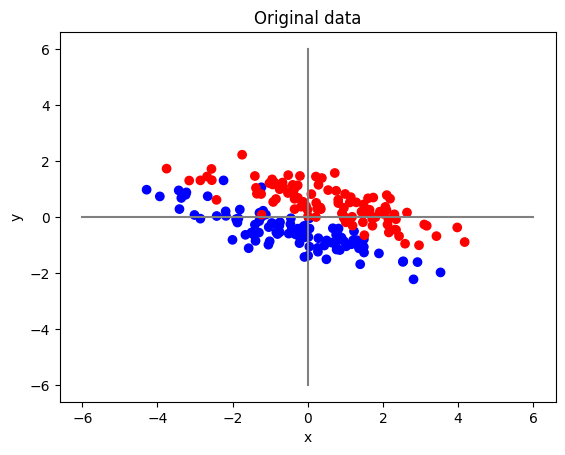

In [2]:
num_points = 100

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 1
data_class1 = multivariate_normal(mean=[-0.5, -0.5], cov=[[3, -1], [-1, 0.5]], size=num_points)

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 2
data_class2 = multivariate_normal(mean=[0.5, 0.5], cov=[[3, -1], [-1, 0.5]], size=num_points)

# รวมข้อมูลจากทั้ง 2 class มาเก็บไว้ในตัวแปร data และเก็บ label (class) เอาไว้ในตัวแปรชื่อ labels
data = np.concatenate((data_class1, data_class2), axis=0)
labels = np.zeros(num_points*2, )
labels[num_points:] = 1

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

# ใช้สีน้ำเงินสำหรับแสดงจุดข้อมูลที่มาจาก class 1 (label=0) และใช้สีแดงสำหรับแสดงจุดข้อมูลที่มาจาก class 2 (label=1)
cmap = colors.ListedColormap(["blue","red"]) 

fig, ax = plt.subplots()

# แสดงรูปข้อมูลเริ่มต้น
ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax.plot([0, 0], y_disp, c="grey") # Plot แกน y
ax.plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax.set(xlabel='x', ylabel='y')
ax.set_title("Original data")
fig.show()

ต่อมาเราจะลองใช้เทคนิค PCA เพื่อลดจำนวนมิติของข้อมูลนี้กัน

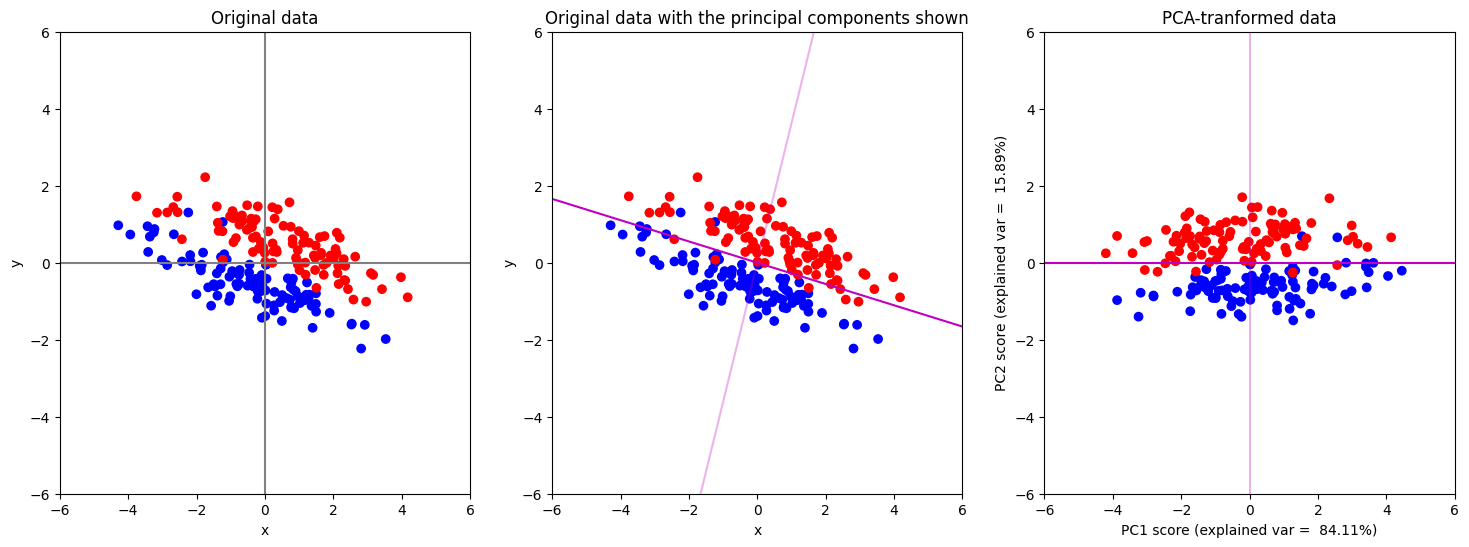

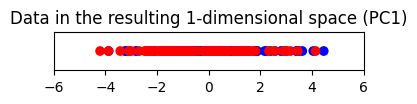

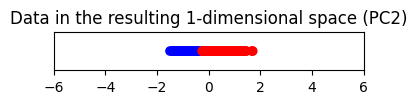

In [5]:
# สร้าง PCA สำหรับตัวอย่างนี้เราจะไม่ whiten ข้อมูลของเรา โดยการกำหนด whiten=False แต่ในการใช้งานจริง การทำ whitening เป็นสิ่งที่ค่อนข้างมีความสำคัญมาก
model_PCA = PCA(n_components=2, whiten=False)

# การทำ PCA เราไม่ใช้ข้อมูลว่าจุดข้อมูลไหนมาจาก class ไหนเลย (หรืออาจมองว่า PCA มองทุกจุดเป็นสีเดียวกันก็ได้)
model_PCA.fit(data)

# ดึงเอา principal component (pc) ออกมา
pc1 = model_PCA.components_[0]
pc2 = model_PCA.components_[1]

# คำนวณหาความชันของเส้นตรงที่วิ่งผ่านจุด (0,0) และว่ิงไปในทิศทางเดียวกับ principal component -> y = m*x
m_pc1 = pc1[1]/pc1[0] 
m_pc2 = pc2[1]/pc2[0]

# คำนวณพิกัดใหม่ของทุกจุดข้อมูล
data_pca = model_PCA.transform(data)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title("Original data")

# แสดงรูปข้อมูลเริ่มต้นโดยมี principal component ทั้ง 2 อันแสดงอยู่ด้วย
ax[1].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[1].plot(x_disp, [m_pc1*x_disp[0], m_pc1*x_disp[1]], c="m", alpha=1) # แสดง pc1 โดยใช้สมการ y = m1*x
ax[1].plot(x_disp, [m_pc2*x_disp[0], m_pc2*x_disp[1]], c="m", alpha=0.3) # แสดง pc2 โดยใช้สมการ y = m2*x
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title("Original data with the principal components shown")

# แสดงข้อมูลหลังถูก transform ด้วย PCA (หน้าตาจะเหมือนกับรูปที่แล้ว แต่มีการหมุนแกน)
ax[2].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
ax[2].plot([0, 0], y_disp, c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน y
ax[2].set(xlabel=f"PC1 score (explained var = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}%)", 
          ylabel=f"PC2 score (explained var = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}%)")
ax[2].set_title("PCA-tranformed data")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()


# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC2 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 0]), c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space (PC1)")
plt.yticks([])

# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC1 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 1], np.zeros_like(data_pca[:, 1]), c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space (PC2)")
plt.yticks([])
plt.show()

In [4]:
print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

% variance captured by PC1 =  84.11
% variance captured by PC2 =  15.89


เทคนิค PCA เลือกแกน PC1 ที่อธิบาย variance ในข้อมูลสูง (มากกว่า 80%) แต่เมื่อลดมิติลงมาแล้วพบว่า PC1 score ของทั้งสอง class มาซ้อนทับกัน

แต่ถ้าเราลดมิติลงโดยการเก็บ PC2 ไว้แทน จะพบว่าข้อมูลจากทั้งสอง class จะแยกออกจากกันได้ดีกว่า

---

เรามาลองดูอีกตัวอย่างหนึ่ง